## Lab 4 - Linear Regression & Multiple Regression
## Date - 14/08/24

CSV file 'yield_data.csv' created.
Linear Regression: y = 0.01x + 2.31
Polynomial Regression (degree 2): y = 7.96x^2 + -0.15x + 0.00
Linear Regression MSE: 0.13, RMSE: 0.36
Polynomial Regression MSE: 2999928958.53, RMSE: 54771.61


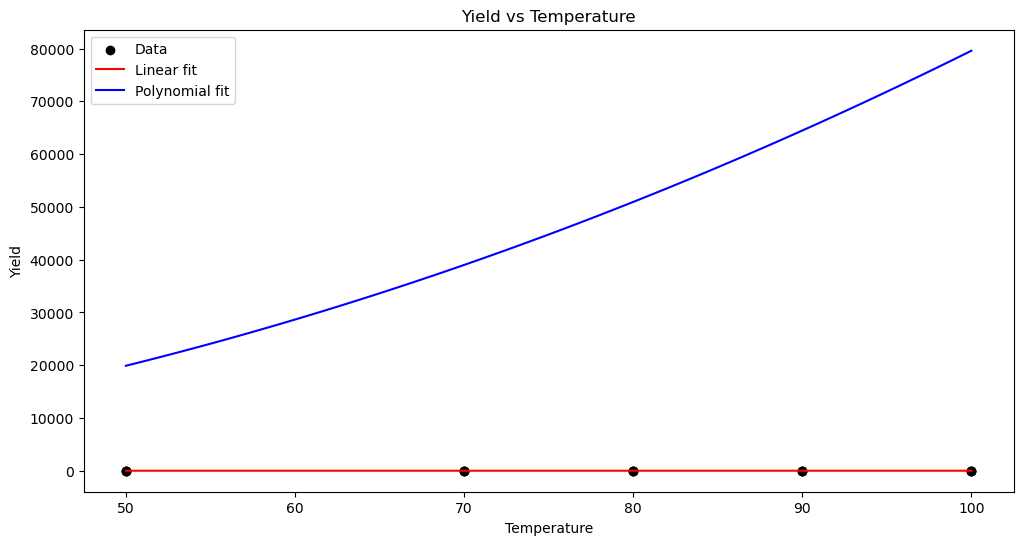

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Temp': [50, 50, 50, 70, 70, 70, 80, 80, 80, 90, 90, 90, 100, 100, 100],
    'Yield': [3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0]
}

df = pd.DataFrame(data)

csv_filename = 'yield_data.csv'
df.to_csv(csv_filename, index=False)

print(f"CSV file '{csv_filename}' created.")

# Load data
x = df['Temp'].values
y = df['Yield'].values

# Linear regression
def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

# Polynomial regression (degree 2)
def polynomial_regression(x, y, degree):
    A = np.vander(x, degree + 1, increasing=True)
    coeffs = np.linalg.lstsq(A, y, rcond=None)[0]
    return coeffs

# Linear regression coefficients
m, c = linear_regression(x, y)
print(f'Linear Regression: y = {m:.2f}x + {c:.2f}')

# Polynomial regression coefficients (degree 2)
coeffs = polynomial_regression(x, y, degree=2)
print(f'Polynomial Regression (degree 2): y = {coeffs[0]:.2f}x^2 + {coeffs[1]:.2f}x + {coeffs[2]:.2f}')

# Predict using the models
def predict_linear(x, m, c):
    return m * x + c

def predict_polynomial(x, coeffs):
    return coeffs[0] * x**2 + coeffs[1] * x + coeffs[2]

# Calculate predictions
y_pred_linear = predict_linear(x, m, c)
y_pred_poly = predict_polynomial(x, coeffs)

# Compute error metrics
def compute_metrics(y_true, y_pred):
    errors = y_true - y_pred
    mse = np.mean(errors**2)
    rmse = np.sqrt(mse)
    return mse, rmse

mse_linear, rmse_linear = compute_metrics(y, y_pred_linear)
mse_poly, rmse_poly = compute_metrics(y, y_pred_poly)

print(f'Linear Regression MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}')
print(f'Polynomial Regression MSE: {mse_poly:.2f}, RMSE: {rmse_poly:.2f}')

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(x, y, color='black', label='Data')

# Linear fit
plt.plot(x, y_pred_linear, color='red', label='Linear fit')

# Polynomial fit
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit_poly = predict_polynomial(x_fit, coeffs)
plt.plot(x_fit, y_fit_poly, color='blue', label='Polynomial fit')

plt.xlabel('Temperature')
plt.ylabel('Yield')
plt.title('Yield vs Temperature')
plt.legend()
plt.show()


Coefficients (Ridge Regression): Intercept = 0.05, Region_at_Risk = 0.41, X2 = -0.24, X3 = -0.06
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.12


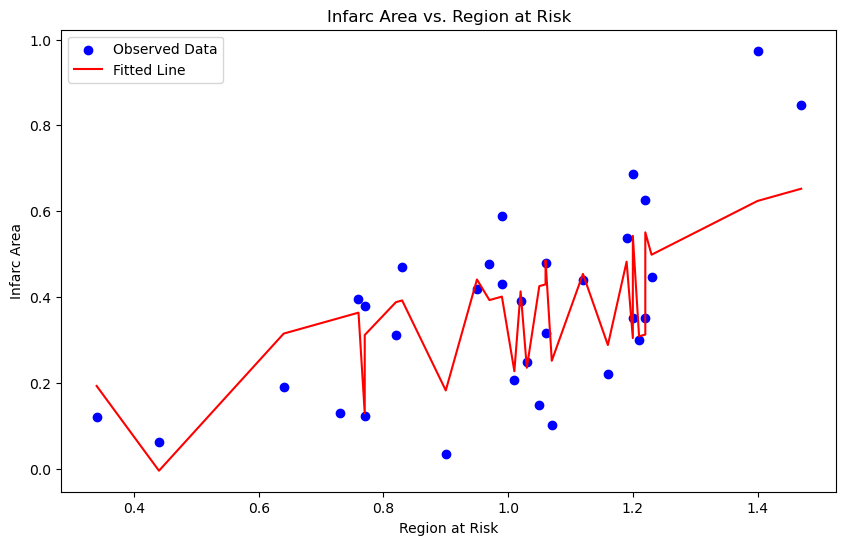

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create and save the CSV file with sample data
data = {
    'Infarc_Area': [
        0.119, 0.19, 0.395, 0.469, 0.13, 0.311, 0.418, 0.48, 0.687, 0.847,
        0.062, 0.122, 0.033, 0.102, 0.206, 0.249, 0.22, 0.299, 0.35, 0.35,
        0.588, 0.379, 0.149, 0.316, 0.39, 0.429, 0.477, 0.439, 0.446, 0.538,
        0.625, 0.974
    ],
    'Region_at_Risk': [
        0.34, 0.64, 0.76, 0.83, 0.73, 0.82, 0.95, 1.06, 1.2, 1.47,
        0.44, 0.77, 0.9, 1.07, 1.01, 1.03, 1.16, 1.21, 1.2, 1.22,
        0.99, 0.77, 1.05, 1.06, 1.02, 0.99, 0.97, 1.12, 1.23, 1.19,
        1.22, 1.4
    ],
    'X2': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0
    ],
    'X3': [
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0
    ]
}

df = pd.DataFrame(data)
df.to_csv('rabbit_experiment_data.csv', index=False)

# Load the data from the CSV file
df = pd.read_csv('rabbit_experiment_data.csv')

# Define the variables
X = df[['Region_at_Risk', 'X2', 'X3']].values
y = df['Infarc_Area'].values

# Add a column of ones to X for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Fit the ridge regression model to avoid singular matrix issues
def fit_ridge_regression(X, y, alpha=1.0):
    XtX = X.T @ X
    XtX_reg = XtX + alpha * np.eye(XtX.shape[0])  # alpha is the regularization strength
    XtY = X.T @ y
    beta = np.linalg.inv(XtX_reg) @ XtY
    return beta

# Fit Ridge Regression model
alpha = 1.0  # Regularization strength
coefficients = fit_ridge_regression(X, y, alpha)
print(f'Coefficients (Ridge Regression): Intercept = {coefficients[0]:.2f}, '
      f'Region_at_Risk = {coefficients[1]:.2f}, X2 = {coefficients[2]:.2f}, X3 = {coefficients[3]:.2f}')

# Calculate predictions
y_pred = X @ coefficients

# Compute errors
errors = y - y_pred
mse = np.mean(errors**2)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(df['Region_at_Risk'], y, label='Observed Data', color='blue')

# Plot the fitted line
# We use the sorted 'Region_at_Risk' values to make the plot
sorted_indices = np.argsort(df['Region_at_Risk'])
plt.plot(df['Region_at_Risk'].values[sorted_indices], y_pred[sorted_indices], color='red', label='Fitted Line')

# Add labels and title
plt.xlabel('Region at Risk')
plt.ylabel('Infarc Area')
plt.title('Infarc Area vs. Region at Risk')
plt.legend()
plt.show()
